<a href="https://colab.research.google.com/github/PyYakuza/Forest-Cover-Type-Classification-NN/blob/main/forest_covertype_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forest Cover Type Classification with Deep Neural Networks**

---

### **Abstract**

I trained a deep neural network to classify 1.2 million cartographic datapoints into 7 different classes. On the test data, I achieved an average recall score of 90.4%. The neural network, which has 8,072 parameters and 190 neurons, consists of a single hidden layer (128 neurons) connected to a final 8-way softmax. To make the training faster, I used premium GPU allocation units provided by the Google Colaboratory platform. At $9.99, the computing units provided were more than enough for the task. 

### 1. **Introduction**

The specific contributions of this project are as follows:


*  How I addressed the skewed class distribution problem in the dataset using the Synthetic Minority Over-sampling Technique (SMOTE).
*  How I applied the Keras ModelCheckpoint callback during training to capture the best optimized model on the basis validation loss. 
*  How I handled some of the reproducibility issues inherent in the use of neural networks by applying Central Limit Theorem. 

### 2. **Importation of Relevant Modules**

In [ ]:
from tensorflow.random import set_seed

set_seed(35)
from numpy.random import seed

seed(35)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

from google.colab import drive

drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


### 3. **Dataset Description and Analyses**

The dataset consists of 581,012 cartographic datapoints belonging to 7 cover types. These were derived from data obtained from the US Geological Survey and US Forest Service (USFS) Region 2 Resource Information System. The 7 cover types are:
* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

The study area from which these datapoints were derived includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances- so existing forest cover types are mainly a result of ecological processes rather than forest management practices. The raw dataset can be found [here](https://content.codecademy.com/courses/deeplearning-with-tensorflow/dlsp-portfolio-starter-code.zip).

Further analyses of the dataset can be seen below:


In [ ]:
df = pd.read_csv("/gdrive/MyDrive/Deep Learning/Forest Cover Project/cover_data.csv")

In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
print(df.columns)
print("Number of Independent Features: ", len(df.columns) - 1)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
# Quick evaluation of the distribution of all features:
for feature in list(df.columns):
    print(df[feature].describe())
    print("---" * 5)

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64
---------------
count    581012.000000
mean        155.656807
std         111.913721
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64
---------------
count    581012.000000
mean         14.103704
std           7.488242
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64
---------------
count    581012.000000
mean        269.428217
std         212.549356
min           0.000000
25%         108.000000
50%         218.000000
75%         384.000000
max        1397.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64
---------------
count    581012.000000
mean         46.418855
std       

In [ ]:
# Selected features that show considerable variability:
viz_features = list(df.columns[:10])
print(viz_features)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


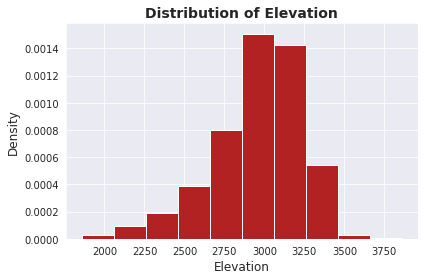

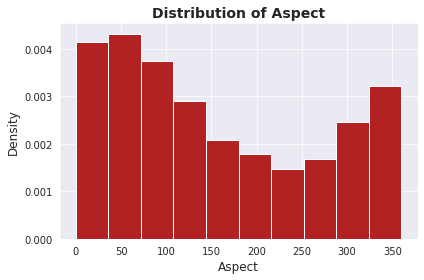

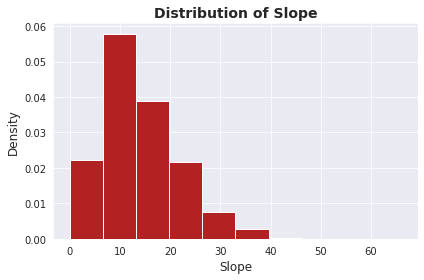

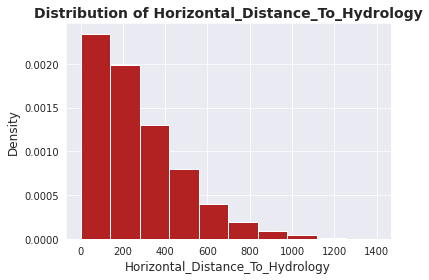

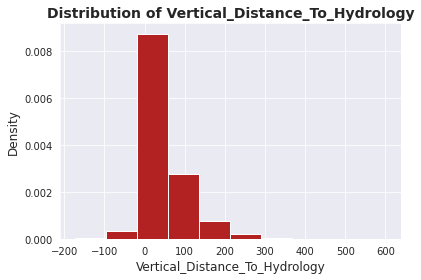

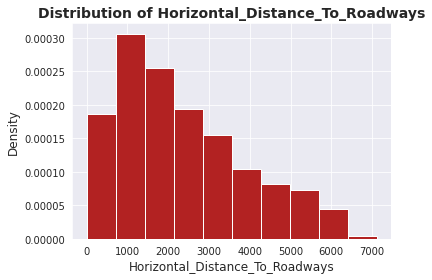

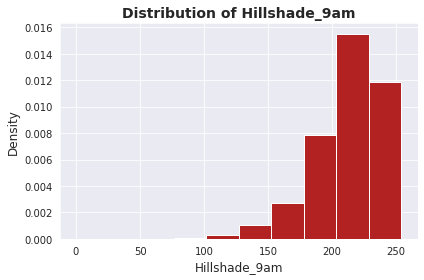

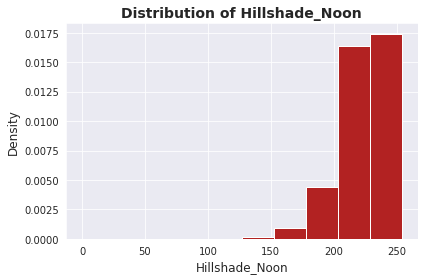

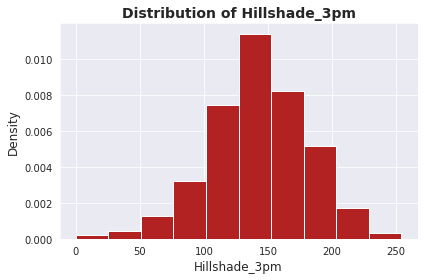

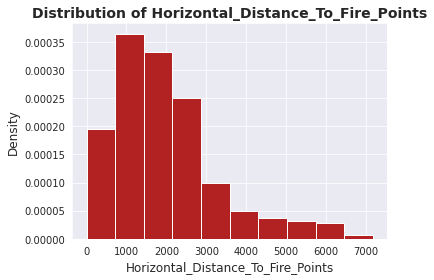

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing the distribution of features that showed considerable variability:
for feature in viz_features:
    plt.hist(df[feature], density=True, color="firebrick")
    plt.title(
        "Distribution of {feature}".format(feature=feature),
        fontsize=14,
        fontweight="bold",
    )
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()
    plt.clf()

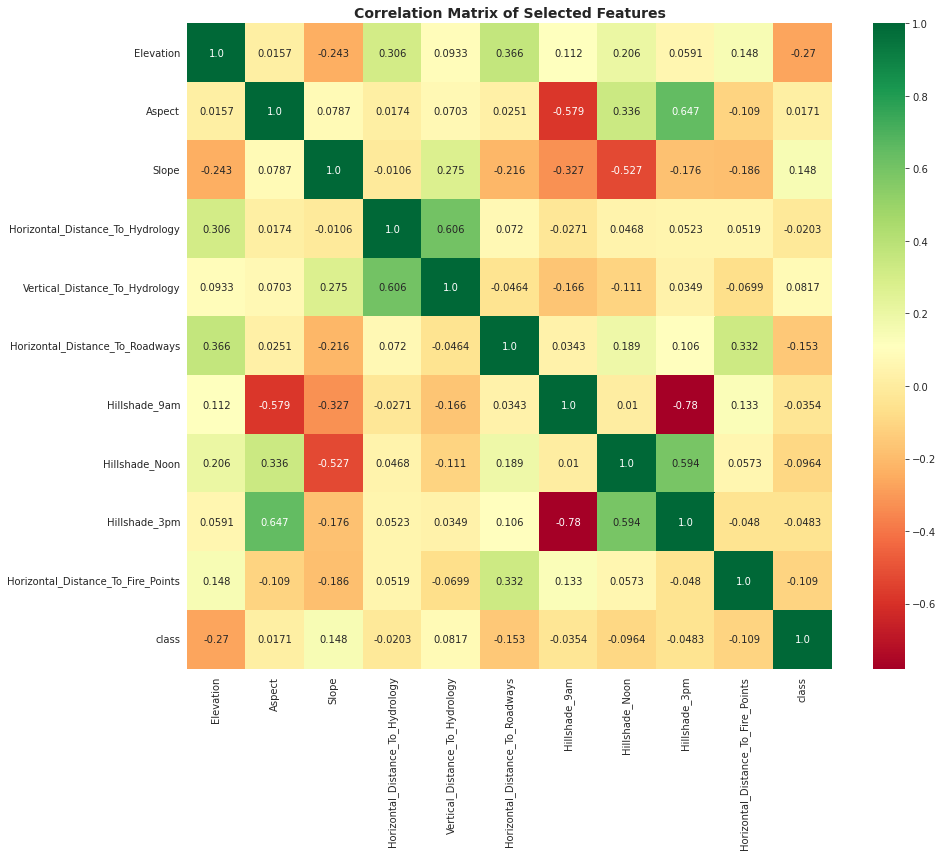

In [ ]:
# Understanding correlation between features that showed considerable variability:
viz_features = viz_features + ["class"]
correlation_matrix = df.copy()[viz_features].corr()
plt.figure(figsize=[14, 12])
sns.heatmap(correlation_matrix, annot=True, fmt=".3", cmap="RdYlGn")
plt.title("Correlation Matrix of Selected Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [ ]:
# Number of Missing Values:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [ ]:
# Notes: Presence of imbalanced classes:
df["class"].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

### 4. **Dataset Separation and Feature Scaling**

In all, there are roughly 1.2 million datapoints (post data-augmentation) in the training set, 156,873 datapoints in the validation set, and 58,102 datapoints in the test set. The separation and scaling of the dataset can be observed below:

In [ ]:
# Separation of test sample from training and validation sample:
np.random.seed(66)
indices = range(len(df))
train_validation_ind = np.random.choice(indices, size=int(0.9 * len(df)), replace=False)
test_ind = list(set(indices) - set(train_validation_ind))
train_validation = df.iloc[train_validation_ind]
test_sample = df.iloc[test_ind]
test_data = test_sample.drop(columns=["class"])
test_labels = test_sample["class"]
test_labels = tf.keras.utils.to_categorical(test_labels, dtype="int64")
# Inspection of class imbalance:

train_validation["class"].value_counts()

2    254972
1    190632
3     32113
7     18501
6     15694
5      8530
4      2468
Name: class, dtype: int64

In [ ]:
# Train-Validation separation and Feature Scaling:
y = train_validation["class"]
X = train_validation.drop(columns=["class"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=6, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=X.columns)
test_data = scaler.transform(test_data)
test_data = pd.DataFrame(data=test_data, columns=X.columns)
print(y_test.shape)
print(y_train.shape)

(156873,)
(366037,)


### 5. **Addressing The Class Imbalance Problem**

As observed during analysis, the dataset is greatly imbalanced− with the majority cover type consisting of 254,972 instances; while the minority cover type consists of merely 2468 instances. Developing a predictive model with such a skewed class distribution has significant drawbacks. These drawbacks will not be discussed in this project. However, for more information on these drawbacks− especially when classification accuracy is used as a performance metric for such a model, kindly refer to this [article](https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/). 
To tackle the imbalance problem in the dataset, I employed the use of [Synthetic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813) (SMOTE). Using this method, I was able to synthetically generate instances of the minority classes to match the frequency of the majority class. This technique was only applied on the training set. After implementation, the training set size grew from 366,037 instances of disproportionate classes to 1.2 million instances of equally represented classes. The over-sampling strategy implementation can be observed below: 


In [ ]:
# Handling class imbalance with SMOTE by giving equal representation to minority classes:
smote = SMOTE(sampling_strategy="not majority")
smote_train_data, smote_train_labels = smote.fit_resample(X_train, y_train)

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test, dtype="int64")
smote_train_labels = tf.keras.utils.to_categorical(smote_train_labels, dtype="int64")
print(y_test.shape)
print(smote_train_labels.shape)
print(smote_train_data.shape)

(156873, 8)
(1249360, 8)
(1249360, 54)


### 6. **Neural Network Architecture**

The network architecture is described in the function below. It has a single hidden layer with a ReLU activation function, and 128 neurons, connected to an 8-way softmax which produces a distribution across the 7 class labels. 

In [ ]:
def nn_architecture():
    model = Sequential(name="Forest_Cover_Classifier")
    input = InputLayer(input_shape=(X.shape[1],))
    # add the input layer:
    model.add(input)
    # add a hidden layer:
    model.add(Dense(128, activation="relu"))
    # add an output layer to our model:
    model.add(Dense(smote_train_labels.shape[1], activation="softmax"))
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()],
        optimizer=opt,
    )
    return model

In [ ]:
model = nn_architecture()
model.summary()

Model: "Forest_Cover_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 8,072
Trainable params: 8,072
Non-trainable params: 0
_________________________________________________________________


### 7. **Model Implementation and Performance Evaluation**

The training set was divided into 125 batches with a batch size of 10,000. I also chose an Adam optimization algorithm with a learning rate of 0.01, and an epoch number of 500. The model loss and metric of choice are categorical cross entropy and categorical accuracy, respectively. Given my desire to achieve some level of reproducibility in implementation, and to capture the best optimized model in the training process, the following steps were taken:


* I developed a function that calculated a 95% confidence interval on the basis of this formula:
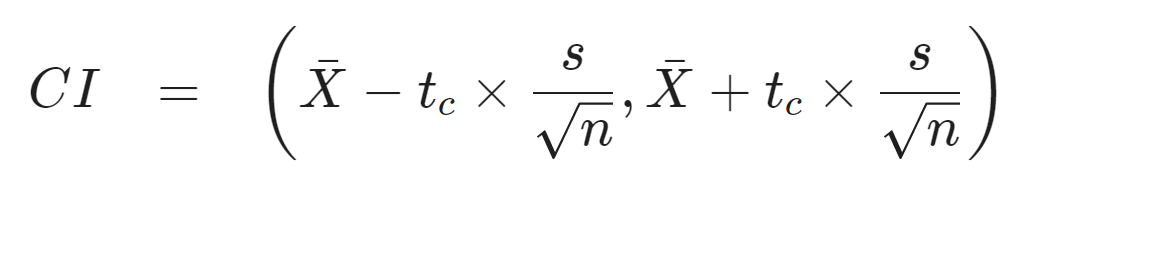
* Running 30 iterations of the model, I collected the final (at the end of 500 epochs) training categorical cross entropy loss, training categorical accuracy, validation categorical cross entropy loss, and validation categorical accuracy. 
* I applied the confidence interval function to obtain the lower and upper limits of the training and validation cross entropy loss and categorical accuracy. (Please refer to the [section notes](https://colab.research.google.com/drive/1qR0vFBirHZww-F4__sta5qSKW-HenuGI#scrollTo=Section_Notes_) for an explanation of this step).
* Using the Keras’ ModelCheckpoint callback on each iteration, I captured the best optimized model (on the basis of validation loss) to a HDF5 file. I also captured the epoch on which the optimized model was achieved.
* I created visualizations of the categorical cross entropy loss and categorical accuracy on the training and validation set using the model iteration that produced the best optimized model. 
* I calculated the categorical cross entropy loss, categorical accuracy, classification report, and confusion matrix on the test set using the best optimized model. 




In [ ]:
def confidence_intervals(
    array1, array2
):  # calculates confidence intervals of selected model performance metrics
    array1_mean = np.mean(array1)
    array2_mean = np.mean(array2)
    array1_std = np.std(array1)
    array2_std = np.std(array2)
    array1_standard_error = array1_std / np.sqrt(len(array1))
    array2_standard_error = array2_std / np.sqrt(len(array2))
    array1_lower_bound = array1_mean - (2.045 * array1_standard_error)
    array1_upper_bound = array1_mean + (2.045 * array1_standard_error)
    array2_lower_bound = array2_mean - (2.045 * array2_standard_error)
    array2_upper_bound = array2_mean + (2.045 * array2_standard_error)
    return (
        array1_lower_bound,
        array1_upper_bound,
        array2_lower_bound,
        array2_upper_bound,
    )

In [ ]:
import h5py

path = "/gdrive/MyDrive/Deep Learning/Forest Cover Project/best_model.hdf5"


def model_evaluation():
    iteration_count = 0
    models = []
    best_models = []
    val_categorical_acc = np.array([], "float32")
    val_loss = np.array([], "float32")
    categorical_acc = np.array([], "float32")
    loss = np.array([], "float32")
    min_val_loss = []
    epoch_min_val_loss = []
    max_val_acc = []
    callback1 = ModelCheckpoint(
        path, monitor="val_loss", mode="min", verbose=1, save_best_only=True
    )
    for i in range(30):
        history = model.fit(
            smote_train_data,
            smote_train_labels,
            batch_size=10000,
            epochs=500,
            verbose=1,
            validation_data=(X_test.to_numpy(), y_test),
            callbacks=[callback1],
        )
        val_categorical_acc = np.append(
            val_categorical_acc, history.history["val_categorical_accuracy"][-1]
        )
        val_loss = np.append(val_loss, history.history["val_loss"][-1])
        categorical_acc = np.append(
            categorical_acc, history.history["categorical_accuracy"][-1]
        )
        loss = np.append(loss, history.history["loss"][-1])
        min_val_loss.append(min(history.history["val_loss"]))
        epoch_min_val_loss.append(np.argmin(history.history["val_loss"]) + 1)
        max_val_acc.append(max(history.history["val_categorical_accuracy"]))
        models.append(history)
        saved_model = load_model(path)
        best_models.append(saved_model)
        iteration_count += 1
        print("Iterations Completed: ", iteration_count)

    min_val_loss = np.array(min_val_loss)
    max_val_acc = np.array(max_val_acc)
    loss_lower, loss_upper, cat_acc_lower, cat_acc_upper = confidence_intervals(
        loss, categorical_acc
    )
    (
        val_loss_lower,
        val_loss_upper,
        val_cat_acc_lower,
        val_cat_acc_upper,
    ) = confidence_intervals(val_loss, val_categorical_acc)

    return (
        loss_lower,
        loss_upper,
        cat_acc_lower,
        cat_acc_upper,
        val_loss_lower,
        val_loss_upper,
        val_cat_acc_lower,
        val_cat_acc_upper,
        min_val_loss,
        epoch_min_val_loss,
        max_val_acc,
        models,
        best_models,
    )

In [ ]:
(
    loss_lower,
    loss_upper,
    cat_acc_lower,
    cat_acc_upper,
    val_loss_lower,
    val_loss_upper,
    val_cat_acc_lower,
    val_cat_acc_upper,
    min_val_loss,
    epoch_min_val_loss,
    max_val_acc,
    models,
    best_models,
) = model_evaluation()

Streaming output truncated to the last 5000 lines.
125/125 [==============================] - 1s 4ms/step - loss: 0.1632 - categorical_accuracy: 0.9390 - val_loss: 0.3682 - val_categorical_accuracy: 0.8577
Epoch 252/500
125/125 [==============================] - ETA: 0s - loss: 0.1615 - categorical_accuracy: 0.9394
Epoch 252: val_loss did not improve from 0.33629
125/125 [==============================] - 1s 4ms/step - loss: 0.1615 - categorical_accuracy: 0.9394 - val_loss: 0.3676 - val_categorical_accuracy: 0.8625
Epoch 253/500
115/125 [==========================>...] - ETA: 0s - loss: 0.1626 - categorical_accuracy: 0.9389
Epoch 253: val_loss did not improve from 0.33629
125/125 [==============================] - 1s 4ms/step - loss: 0.1622 - categorical_accuracy: 0.9391 - val_loss: 0.3831 - val_categorical_accuracy: 0.8570
Epoch 254/500
113/125 [==========================>...] - ETA: 0s - loss: 0.1631 - categorical_accuracy: 0.9388
Epoch 254: val_loss did not improve from 0.33629
125/

In [ ]:
print(
    "With 95% confidence, the model's mean validation categorical accuracy, after 500 epochs, lies between {a} and {b}".format(
        a=round(val_cat_acc_lower, 4), b=round(val_cat_acc_upper, 4)
    )
)

With 95% confidence, the model's mean validation categorical accuracy, after 500 epochs, lies between 0.8632 and 0.8655


In [ ]:
print(
    "With 95% confidence, the model's mean training categorical accuracy, after 500 epochs, lies between {a} and {b}".format(
        a=round(cat_acc_lower, 4), b=round(cat_acc_upper, 4)
    )
)

With 95% confidence, the model's mean training categorical accuracy, after 500 epochs, lies between 0.9365 and 0.9378


In [ ]:
print(
    "With 95% confidence, the model's mean validation cross-entropy loss, after 500 epochs, lies between {c} and {d}".format(
        c=round(val_loss_lower, 4), d=round(val_loss_upper, 4)
    )
)

With 95% confidence, the model's mean validation cross-entropy loss, after 500 epochs, lies between 0.3611 and 0.3664


In [ ]:
print(
    "With 95% confidence, the model's mean training cross-entropy loss, after 500 epochs, lies between {c} and {d}".format(
        c=round(loss_lower, 4), d=round(loss_upper, 4)
    )
)

With 95% confidence, the model's mean training cross-entropy loss, after 500 epochs, lies between 0.166 and 0.1694


In [ ]:
# minimum validation loss on each of the 30 500-epoch iterations:
print(min_val_loss)

[0.36990917 0.35436624 0.3476387  0.34708771 0.34645715 0.34624204
 0.34453952 0.34564674 0.34413949 0.34319147 0.34352714 0.34345758
 0.34320641 0.34136027 0.34221309 0.34250551 0.34310436 0.34179598
 0.34106544 0.34006    0.34161782 0.33830371 0.33653268 0.33674568
 0.33628839 0.3380143  0.33833838 0.33888113 0.33784717 0.33556235]


In [ ]:
# maximum validation accuracy on each of the 30 500-epoch iterations:
print(max_val_acc)

[0.8569926  0.86375606 0.86617839 0.86622936 0.86663735 0.86716008
 0.86801428 0.86853057 0.86869633 0.86983103 0.86986285 0.87072343
 0.86965889 0.87105495 0.87043023 0.8703537  0.87052584 0.8703537
 0.87030911 0.87092745 0.8711378  0.87109953 0.87145013 0.87153941
 0.87161589 0.87159038 0.87218958 0.8719601  0.87225974 0.87132269]


In [ ]:
val_loss_val_acc = [(i, j) for i, j in zip(min_val_loss, max_val_acc)]
val_loss_val_acc = np.array(val_loss_val_acc)
print(val_loss_val_acc)

[[0.36990917 0.8569926 ]
 [0.35436624 0.86375606]
 [0.3476387  0.86617839]
 [0.34708771 0.86622936]
 [0.34645715 0.86663735]
 [0.34624204 0.86716008]
 [0.34453952 0.86801428]
 [0.34564674 0.86853057]
 [0.34413949 0.86869633]
 [0.34319147 0.86983103]
 [0.34352714 0.86986285]
 [0.34345758 0.87072343]
 [0.34320641 0.86965889]
 [0.34136027 0.87105495]
 [0.34221309 0.87043023]
 [0.34250551 0.8703537 ]
 [0.34310436 0.87052584]
 [0.34179598 0.8703537 ]
 [0.34106544 0.87030911]
 [0.34006    0.87092745]
 [0.34161782 0.8711378 ]
 [0.33830371 0.87109953]
 [0.33653268 0.87145013]
 [0.33674568 0.87153941]
 [0.33628839 0.87161589]
 [0.3380143  0.87159038]
 [0.33833838 0.87218958]
 [0.33888113 0.8719601 ]
 [0.33784717 0.87225974]
 [0.33556235 0.87132269]]


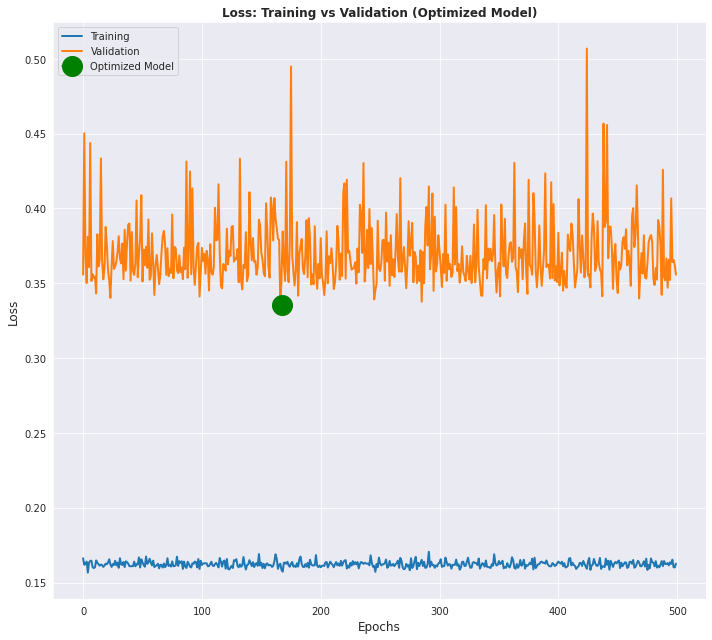

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualization of optimized model performance on Training and Validation Dataset:
plt.figure(figsize=[10, 9])
plt.plot(models[np.argmin(min_val_loss)].history["loss"], label="Training", linewidth=2)
plt.plot(
    models[np.argmin(min_val_loss)].history["val_loss"], label="Validation", linewidth=2
)
plt.plot(
    epoch_min_val_loss[np.argmin(min_val_loss)],
    min(min_val_loss),
    marker="o",
    color="green",
    markersize=20,
    label="Optimized Model",
)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title(
    "Loss: Training vs Validation (Optimized Model)", fontsize=12, fontweight="bold"
)
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

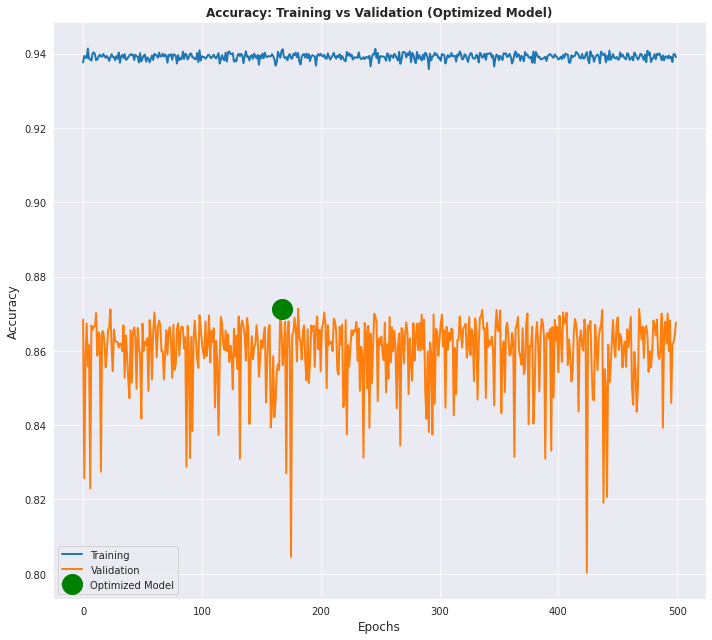

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=[10, 9])
plt.plot(
    models[np.argmin(min_val_loss)].history["categorical_accuracy"],
    label="Training",
    linewidth=2,
)
plt.plot(
    models[np.argmin(min_val_loss)].history["val_categorical_accuracy"],
    label="Validation",
    linewidth=2,
)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.plot(
    epoch_min_val_loss[np.argmin(min_val_loss)],
    max_val_acc[np.argmin(min_val_loss)],
    marker="o",
    color="green",
    markersize=20,
    label="Optimized Model",
)
plt.title(
    "Accuracy: Training vs Validation (Optimized Model)", fontsize=12, fontweight="bold"
)
plt.legend()
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
# using the optimized model to evaluate the test dataset:
best_model = best_models[np.argmin(min_val_loss)]
loss, accuracy = best_model.evaluate(test_data, test_labels, verbose=0)

In [ ]:
print("Entropy Loss on Test Dataset: ", round(loss, 4))
print("Accuracy on Test Dataset: ", round(accuracy, 4))

Entropy Loss on Test Dataset:  0.3339
Accuracy on Test Dataset:  0.8705


In [ ]:
# CLASSIFICATION REPORT:
class_names = [
    "Spruce",
    "Lodgepole",
    "Ponderosa",
    "Cottonwood",
    "Aspen",
    "Douglas-fir",
    "Krummholz",
]
class_names.sort()
y_pred = best_model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
print(classification_report(y_true, y_pred, target_names=class_names))

1816/1816 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

       Aspen       0.88      0.84      0.86     21208
  Cottonwood       0.88      0.88      0.88     28329
 Douglas-fir       0.87      0.93      0.90      3641
   Krummholz       0.85      0.91      0.88       279
   Lodgepole       0.63      0.93      0.75       963
   Ponderosa       0.76      0.89      0.82      1673
      Spruce       0.89      0.96      0.93      2009

    accuracy                           0.87     58102
   macro avg       0.82      0.90      0.86     58102
weighted avg       0.87      0.87      0.87     58102



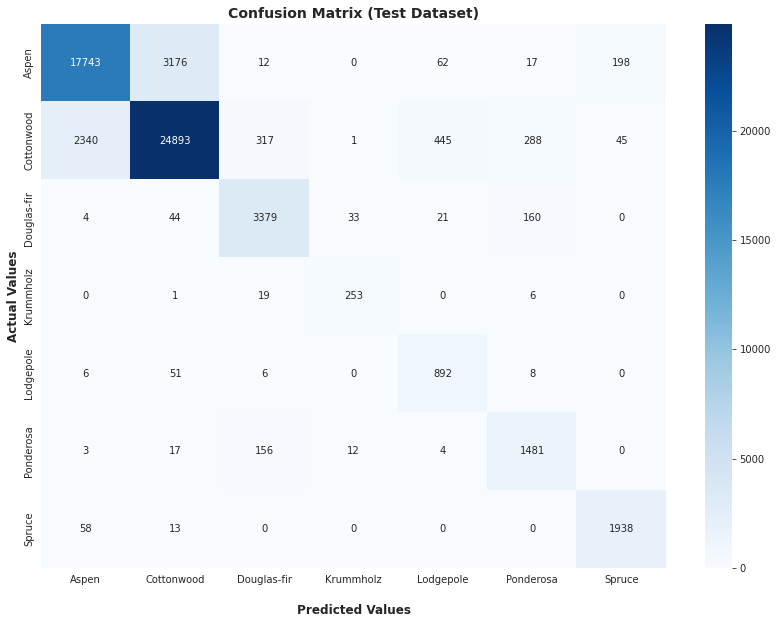

In [ ]:
# CONFUSION MATRIX:
matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=[14, 10])
ax = sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d")

ax.set_title("Confusion Matrix (Test Dataset)", fontweight="bold", fontsize=14)
ax.set_xlabel("\nPredicted Values", fontweight="bold", fontsize=12)
ax.set_ylabel("Actual Values", fontweight="bold", fontsize=12)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

## Display the visualization of the Confusion Matrix.
plt.show()

#### **Section Notes**: 

The formula used for the calculation of the 95% confidence interval is based on a situation where the standard deviation of the population is unknown. Given the sample size (n) of 30, the t-score at 29 degrees of freedom (n-1) corresponding to our level of confidence is 2.045. 

### 8. **Discussion**

An average recall score of 90.4%, on the test set, across the 7 classes is quite impressive. I am of the opinion that the step taken to rectify the skewed class distribution before training was particularly vital in achieving a model that effectively discriminated between these classes.

Given the computational cost and training time of 2 hours, I was not very exhaustive in my selection of network architecture. However, I am pleased with the result, and I believe some improvements can be made− especially with memory usage and reducing training time. 


### 9. **Project Dependencies**

In [ ]:
# Project Dependencies:
!pip install watermark
from watermark import watermark

print("System Architecture and Module Dependencies: ")
print("--" * 5)
print(watermark())
print(
    watermark(
        packages="numpy,matplotlib,seaborn,sklearn,pandas,tensorflow,imblearn,watermark,h5py"
    )
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.6 MB/s 
System Architecture and Module Dependencies: 
----------
Last updated: 2022-11-07T14:19:16.293334+00:00

Python implementation: CPython
Python version       : 3.7.15
IPython version      : 7.9.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.10.133+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

numpy     : 1.21.6
matplotlib: 3.2.2
seaborn   : 0.11.2
sklearn   : 1.0.2
pandas    : 1.3.5
tensorflow: 2.9.2
imblearn  : 0.0
watermark : 2.3.1
h5py      : 3.1.0



In [ ]:
# GPU Information:
gpu_info = !nvidia-smi
gpu_info = "\n".join(gpu_info)
if gpu_info.find("failed") >= 0:
    print("Not connected to a GPU")
else:
    print(gpu_info)

Mon Nov  7 14:19:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    50W / 400W |  17420MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install black[jupyter]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.6 MB/s 
     |████████████████████████████████| 843 kB 61.0 MB/s 
     |████████████████████████████████| 96 kB 7.2 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
# Editing my code to standard formatting:
#!black /gdrive/MyDrive/'Deep Learning'/'Forest Cover Project'